---
# Setup

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Settings de ploteo
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [3]:
# @title Funciones de ploteo

def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.

  Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  plt.show()


def plot_MNIST_reconstruction(X, X_reconstructed, keep_dims):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable
    keep_dims (int)                         : Dimensions to keep

  Returns:
    Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title(f'Reconstructed K: {keep_dims}')
  plt.tight_layout()
  plt.show()


def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 250])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  fig, ax = plt.subplots()
  plt.imshow(np.real(np.reshape(weights, (28, 28))), cmap='seismic')
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_eigenvalues(evals, xlimit=False):
  """
  Plots eigenvalues.

  Args:
     (numpy array of floats) : Vector of eigenvalues
     (boolean) : enable plt.show()
  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')
  if xlimit:
    plt.xlim([0, 100])  # limit x-axis up to 100 for zooming
  plt.show()

In [4]:
# @title Funciones auxiliares

def add_noise(X, frac_noisy_pixels):
  """
  Randomly corrupts a fraction of the pixels by setting them to random values.

  Args:
     X (numpy array of floats)  : Data matrix
     frac_noisy_pixels (scalar) : Fraction of noisy pixels

  Returns:
     (numpy array of floats)    : Data matrix + noise

  """

  X_noisy = np.reshape(X, (X.shape[0] * X.shape[1]))
  N_noise_ixs = int(X_noisy.shape[0] * frac_noisy_pixels)
  noise_ixs = np.random.choice(X_noisy.shape[0], size=N_noise_ixs,
                               replace=False)
  X_noisy[noise_ixs] = np.random.uniform(0, 255, noise_ixs.shape)
  X_noisy = np.reshape(X_noisy, (X.shape[0], X.shape[1]))

  return X_noisy


def change_of_basis(X, W):
  """
  Projects data onto a new basis.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)   : Data matrix expressed in new basis
  """

  Y = np.matmul(X, W)

  return Y


def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
"""

  X = X - np.mean(X, 0)
  cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)
  return cov_matrix


def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    :   Vector of eigenvalues
    evectors (numpy array of floats) :   Corresponding matrix of eigenvectors
                                         each column corresponds to a different
                                         eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2)*np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]

  return evals, evectors


def pca(X):
  """
  Performs PCA on multivariate data. Eigenvalues are sorted in decreasing order

  Args:
     X (numpy array of floats) :   Data matrix each column corresponds to a
                                   different random variable

  Returns:
    (numpy array of floats)    : Data projected onto the new basis
    (numpy array of floats)    : Corresponding matrix of eigenvectors
    (numpy array of floats)    : Vector of eigenvalues

  """

  X = X - np.mean(X, 0)
  cov_matrix = get_sample_cov_matrix(X)
  evals, evectors = np.linalg.eigh(cov_matrix)
  evals, evectors = sort_evals_descending(evals, evectors)
  score = change_of_basis(X, evectors)

  return score, evectors, evals

---
# Sección 1: Realizar PCA en MNIST

El conjunto de datos MNIST consta de 70,000 imágenes de dígitos escritos a mano individualmente. Cada imagen es una imagen en escala de grises de 28x28 píxeles. Para mayor comodidad, cada imagen de 28x28 píxeles a menudo se despliega en un vector único de 784 (=28x28) elementos, de modo que todo el conjunto de datos se representa como una matriz de 70,000 x 784. Cada fila representa una imagen diferente y cada columna representa un píxel diferente.

Ejecute la siguiente celda para cargar el conjunto de datos MNIST y mostrar las primeras nueve imágenes. Puede llevar unos minutos cargarlo.

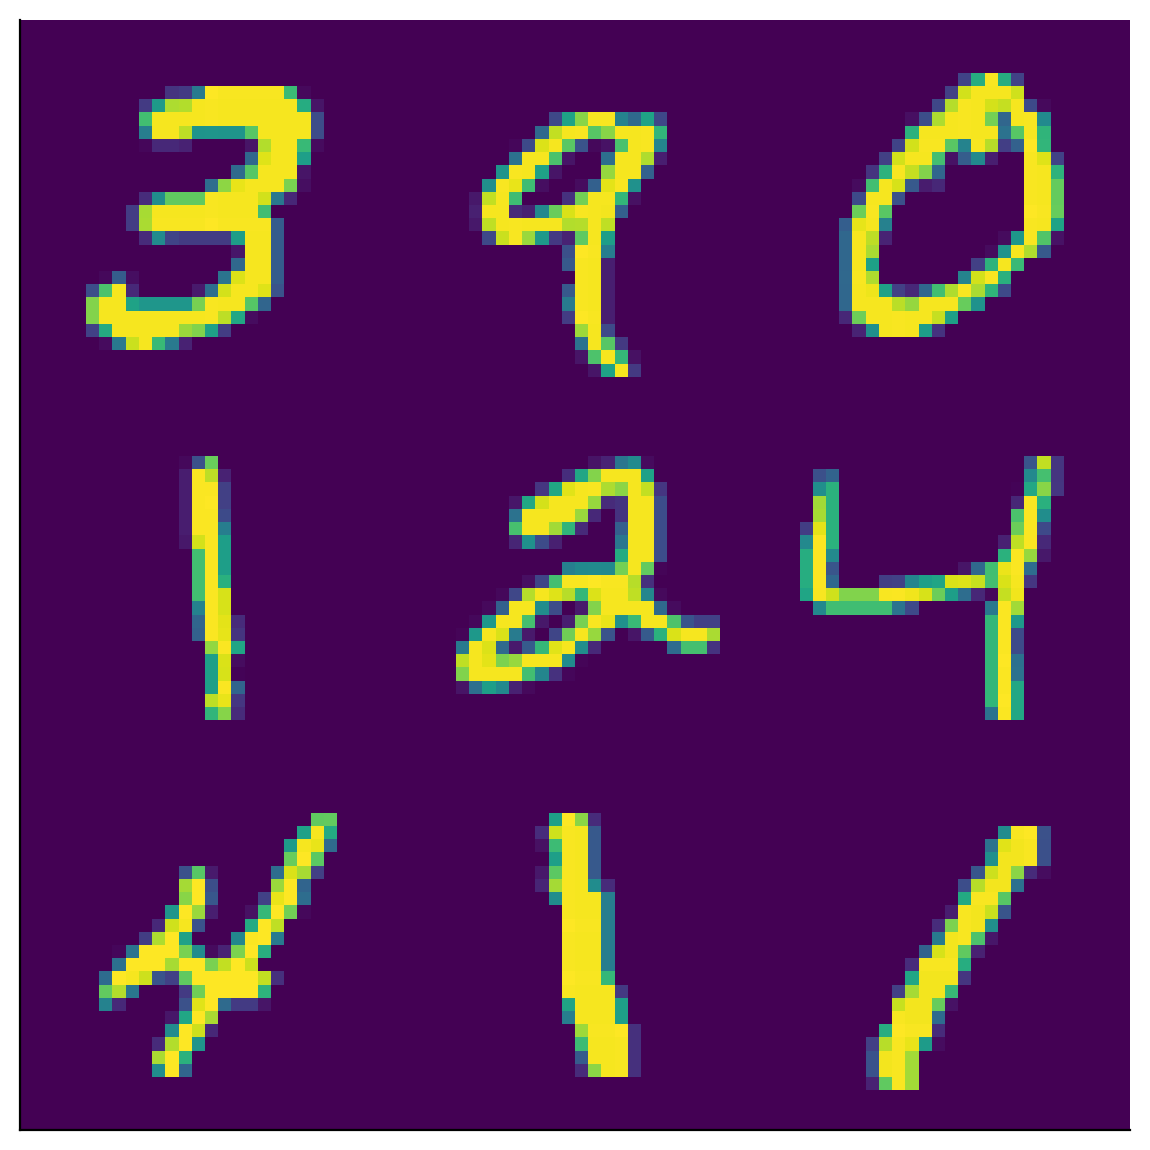

In [5]:
from sklearn.datasets import fetch_openml

# GET mnist data
mnist = fetch_openml(name='mnist_784', as_frame=False, parser='auto')
X = mnist.data

# Visualize
plot_MNIST_sample(X)

El conjunto de datos MNIST tiene una dimensionalidad extrínseca de 784, mucho mayor que los ejemplos bidimensionales utilizados en los tutoriales anteriores. Para comprender estos datos, utilizaremos la reducción de dimensionalidad. Pero primero, necesitamos determinar la dimensionalidad intrínseca $K$ de los datos. Una forma de hacerlo es buscar un "codo" en el gráfico de scree para determinar cuáles autovalores son significativos.

### Varianza explicada


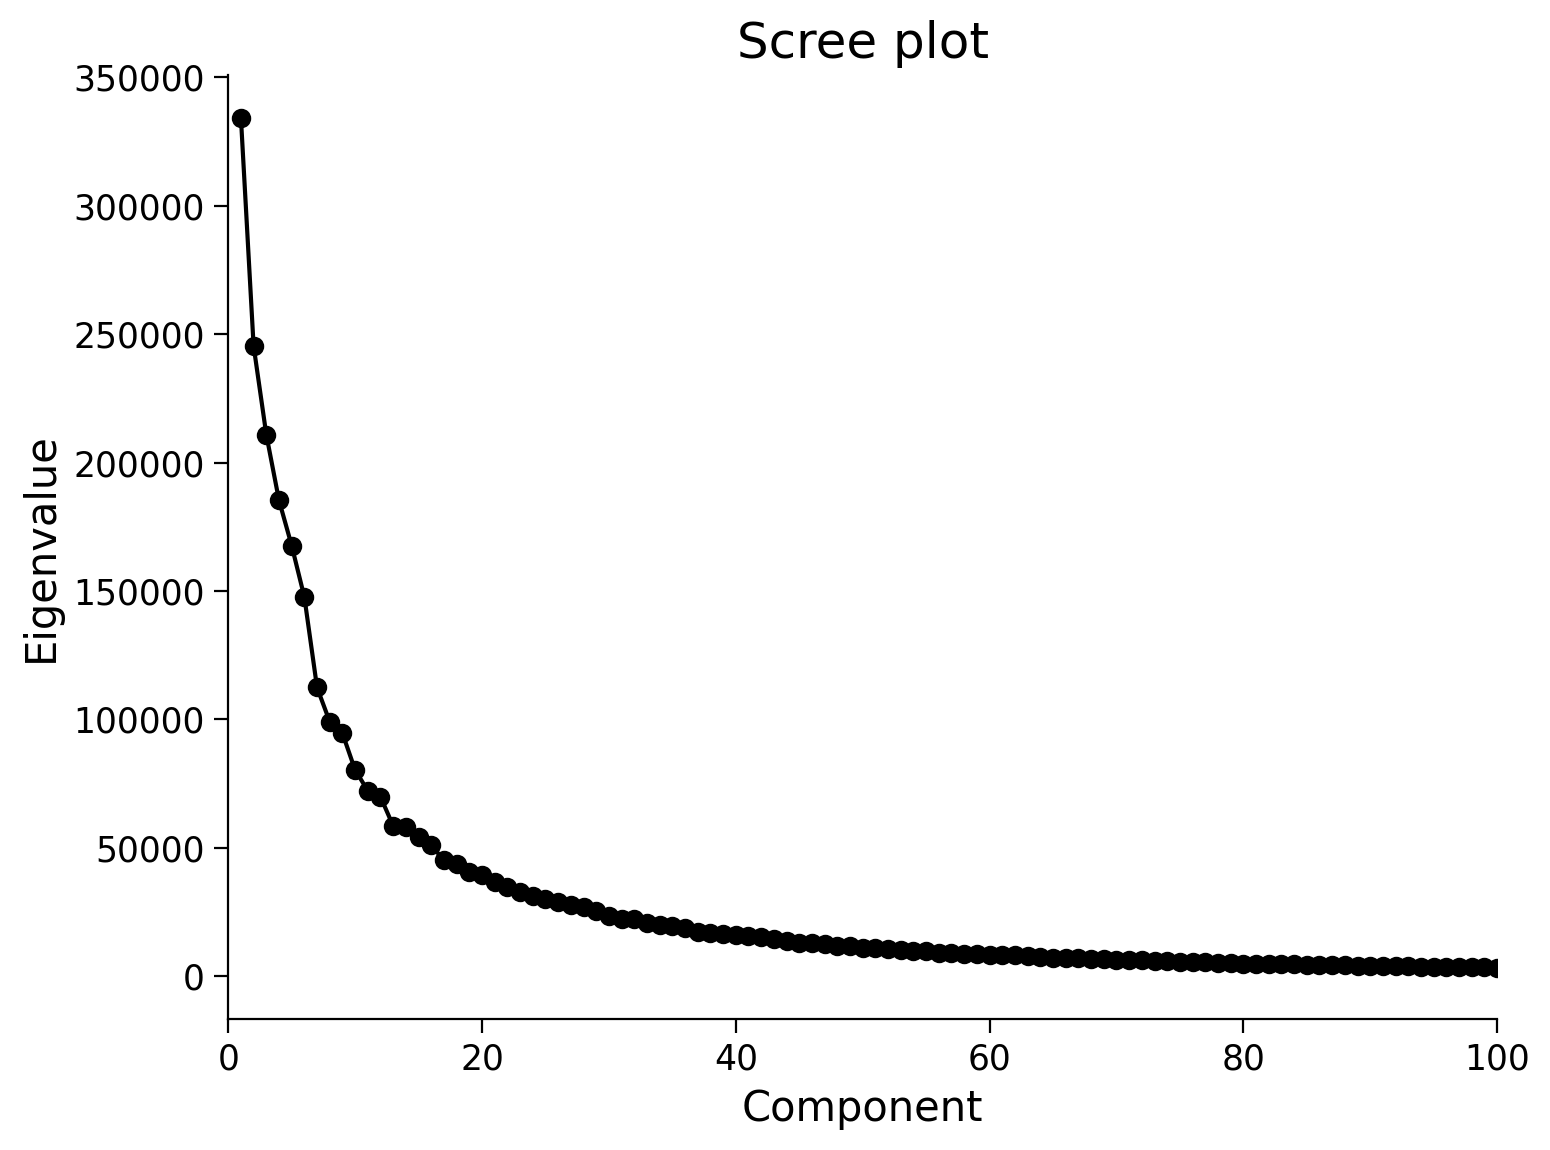

In [6]:
# Perform PCA
score, evectors, evals = pca(X)

# Plot the eigenvalues
plot_eigenvalues(evals, xlimit=True)  # limit x-axis up to 100 for zooming

Text(0.5, 0, 'Componente')

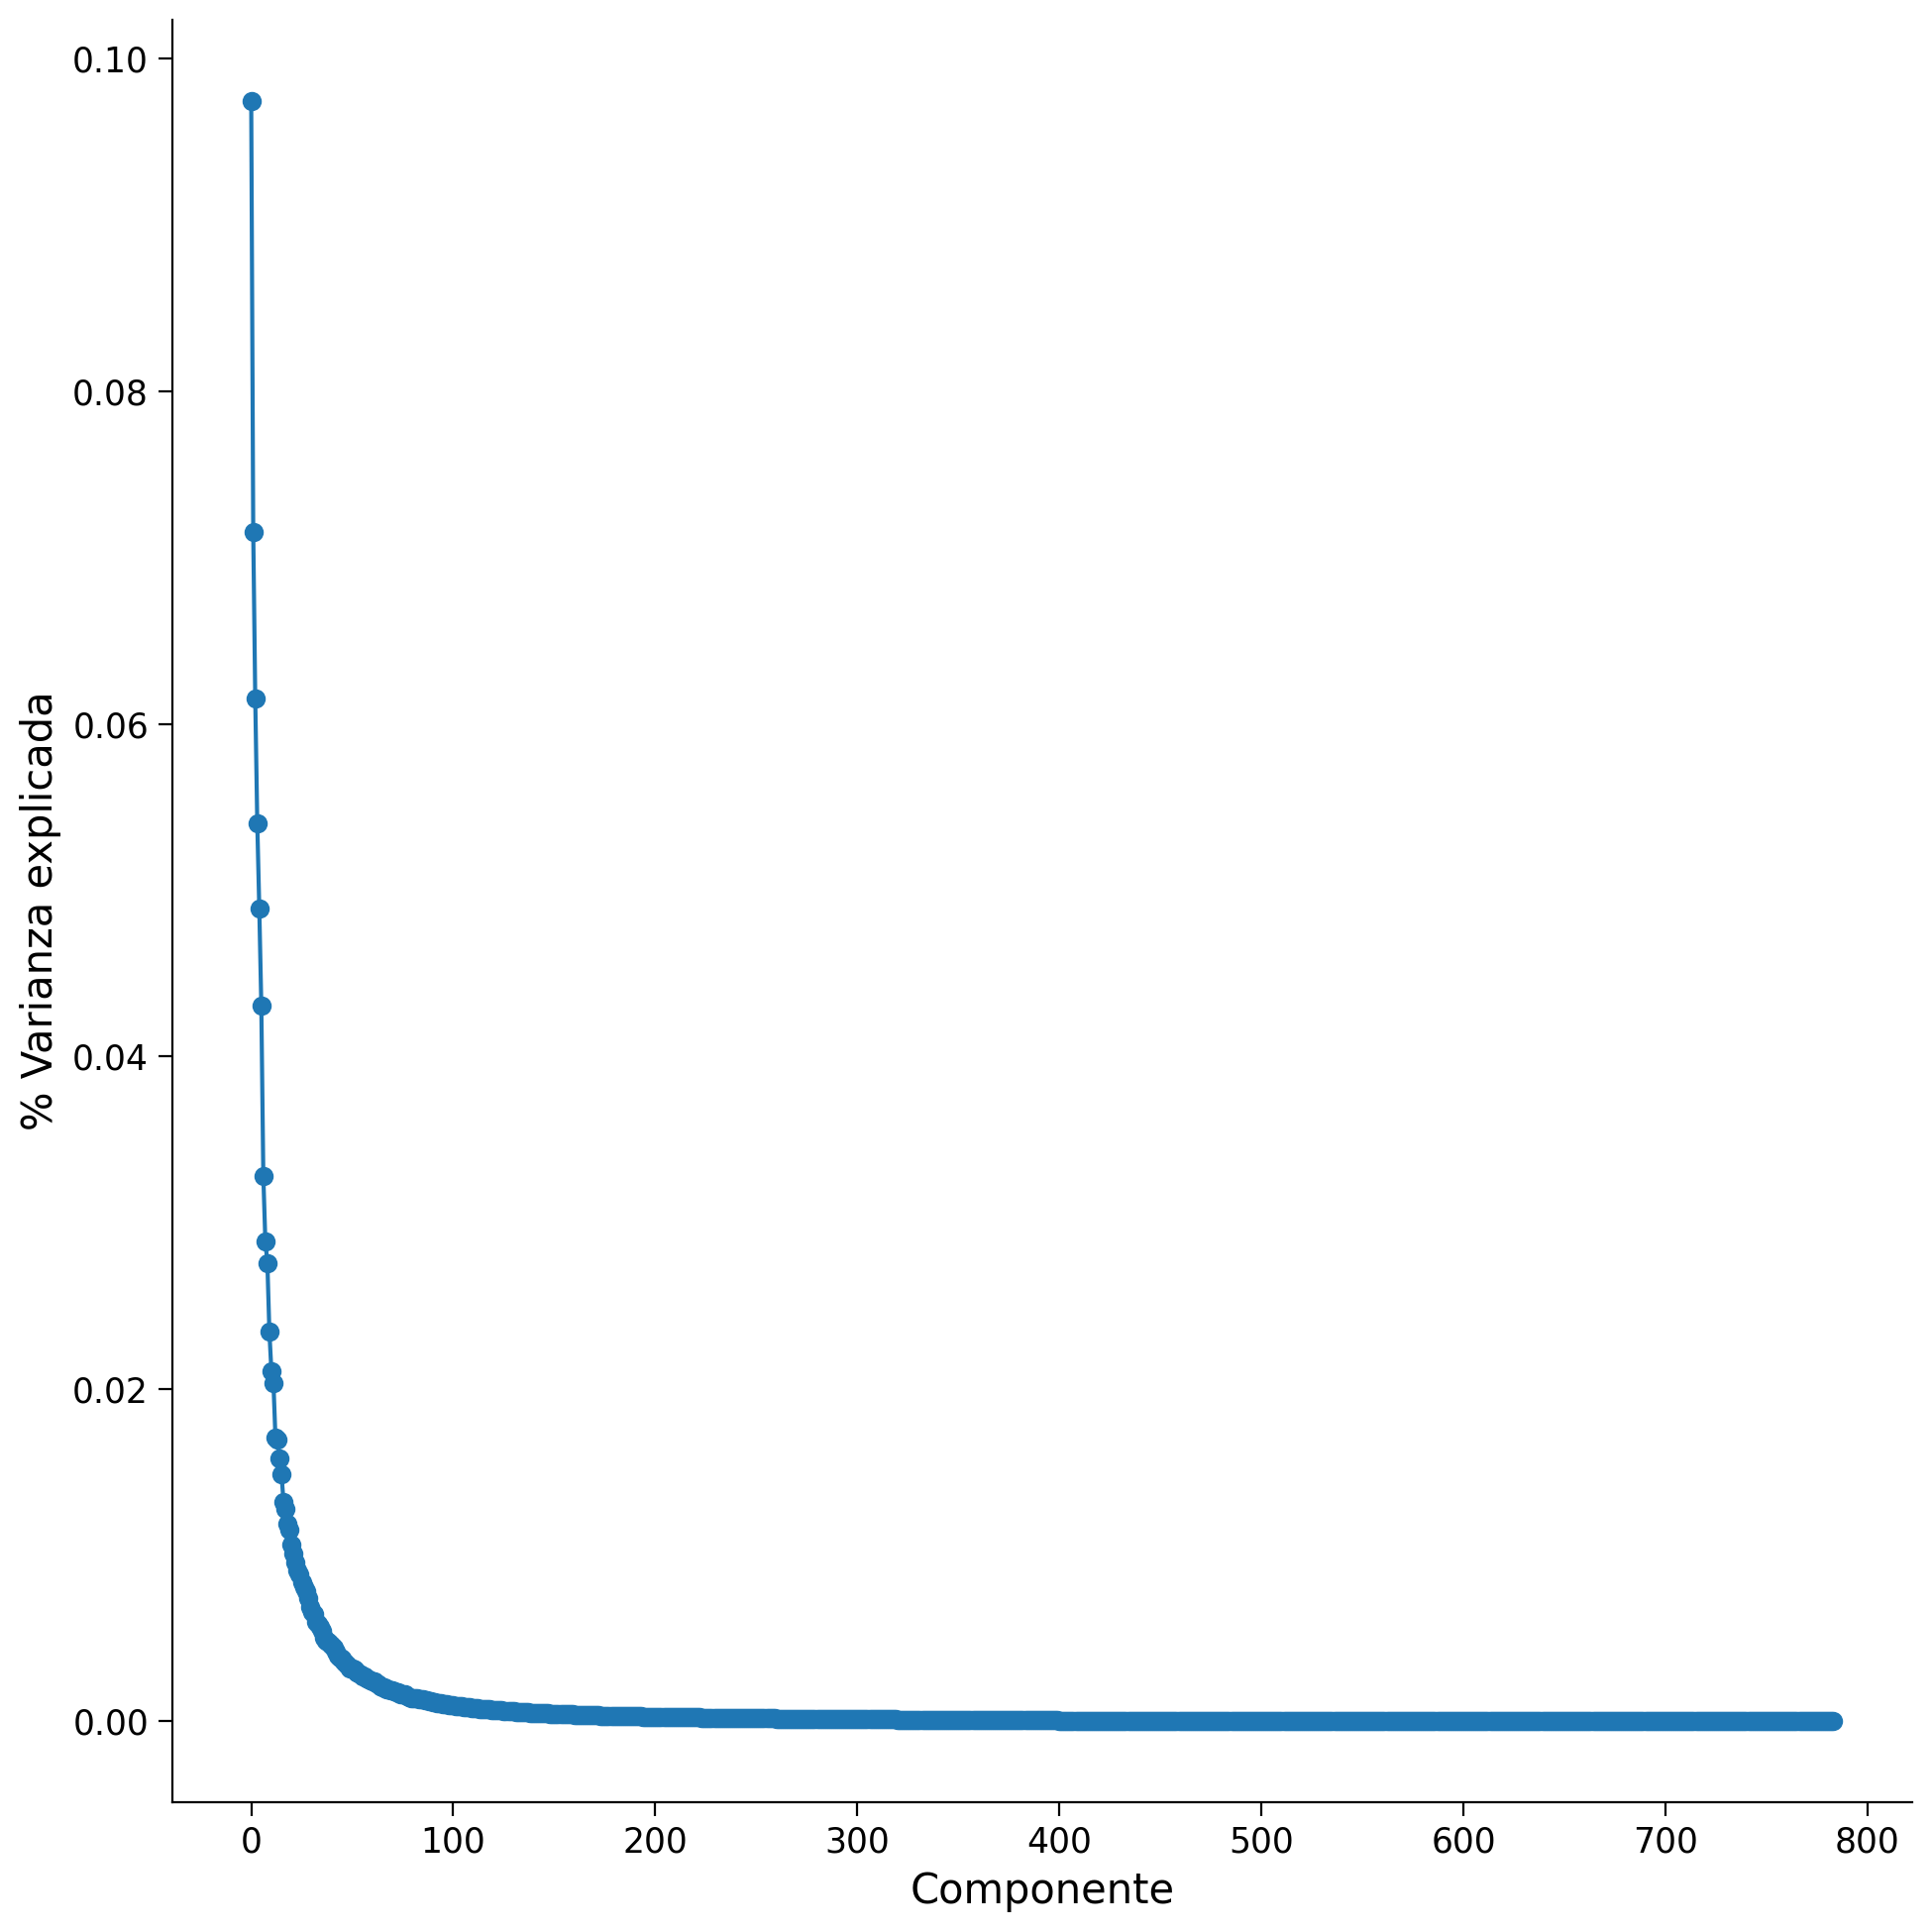

In [7]:
plt.figure(figsize = (10,10))
plt.plot(np.arange(len(evals)), evals/np.sum(evals), marker = 'o')
plt.ylabel('% Varianza explicada')
plt.xlabel('Componente')

# Varianza explicada acumulada



\begin{equation}
\text{var explained} = \frac{\sum_{i=1}^K \lambda_i}{\sum_{i=1}^N \lambda_i}
\end{equation}

donde $\lambda_i$ es el $i^{esimo}$ autovalor y $N$ es el número total de componentes (la cantidad original de dimensiones en los datos).

La dimensionalidad intrínseca a menudo se cuantifica mediante el valor de $K$ necesario para explicar una gran proporción de la varianza total de los datos (a menudo un umbral definido, por ejemplo, el 90%).

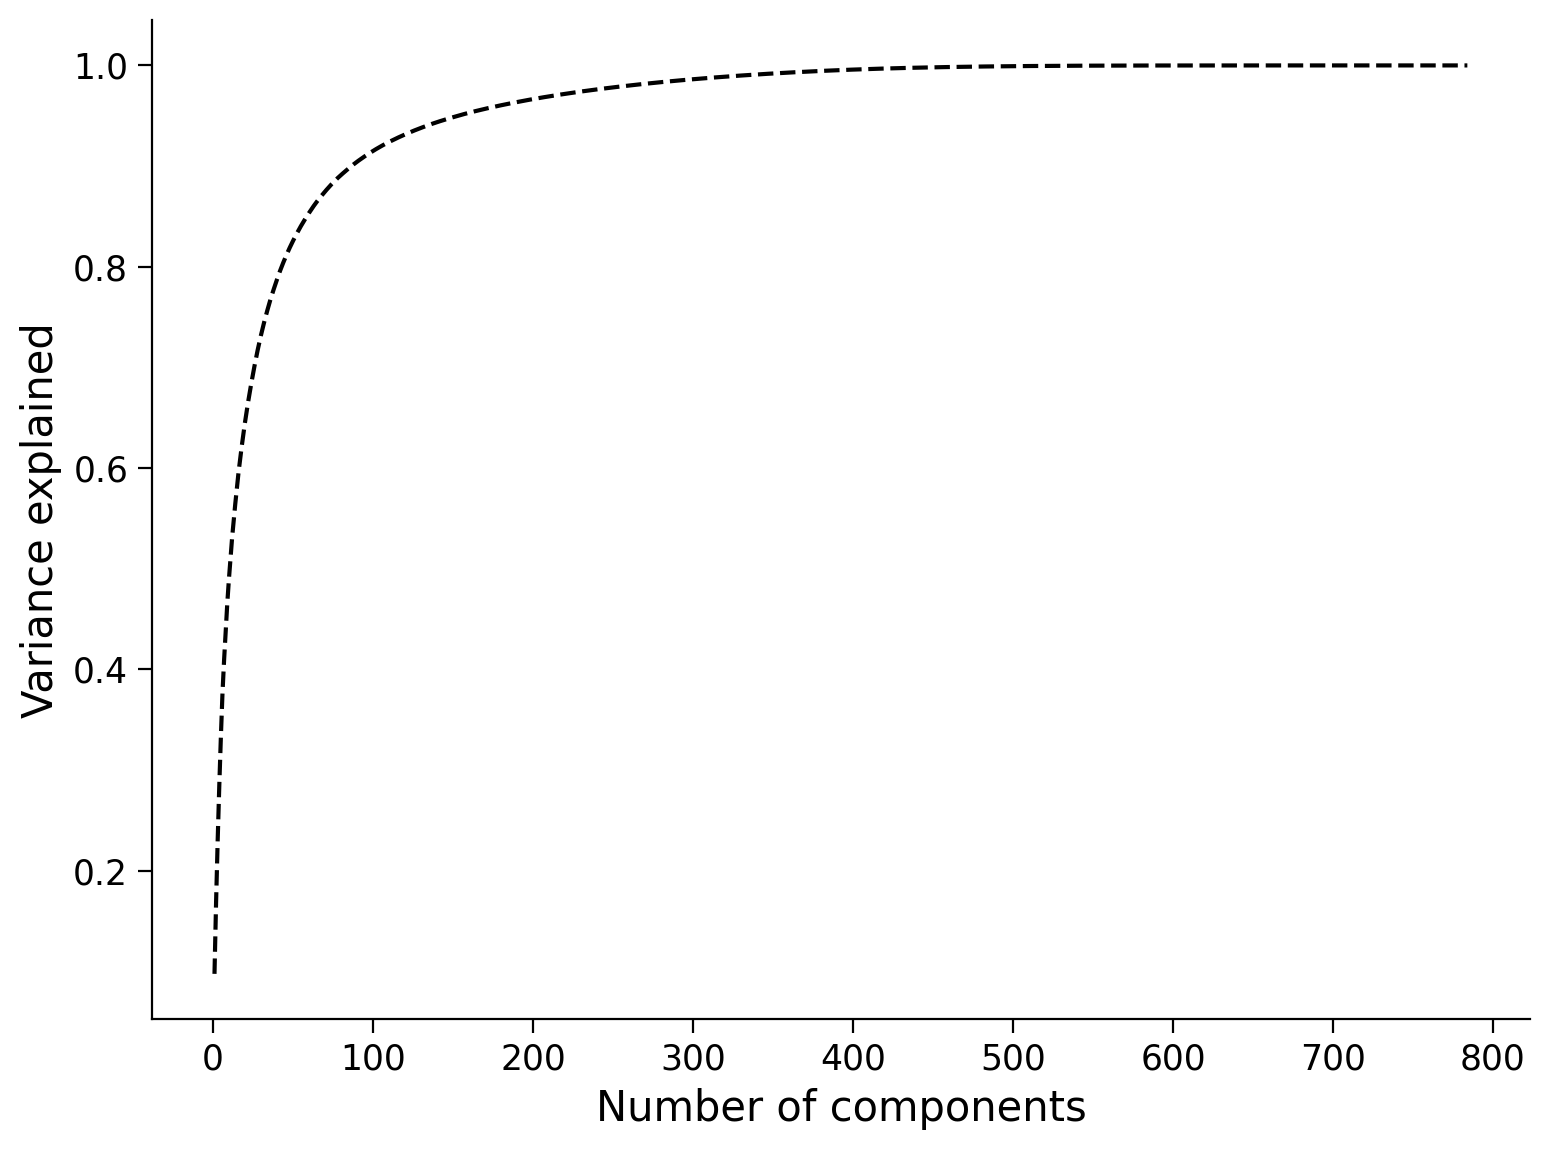

In [8]:
def get_variance_explained(evals):
  """
  Calculates variance explained from the eigenvalues.

  Args:
    evals (numpy array of floats) : Vector of eigenvalues

  Returns:
    (numpy array of floats)       : Vector of variance explained

  """

  #################################################

  # Cumulatively sum the eigenvalues
  csum = np.cumsum(evals)

  # Normalize by the sum of eigenvalues
  variance_explained = csum / np.sum(evals)

  return variance_explained


# Calculate the variance explained
variance_explained = get_variance_explained(evals)

# Visualize
plot_variance_explained(variance_explained)

---
# Reconstruir datos con diferentes números de componentes principales (PC)




Nuestra reconstrucción es:

\begin{equation}
{\bf \hat X = S}_{1:K} ({\bf W}_{1:K})^\top.
\end{equation}

In [9]:
def reconstruct_data(score, evectors, X_mean, K):
  """
  Reconstruct the data based on the top K components.

  Args:
    score (numpy array of floats)    : Score matrix
    evectors (numpy array of floats) : Matrix of eigenvectors
    X_mean (numpy array of floats)   : Vector corresponding to data mean
    K (scalar)                       : Number of components to include

  Returns:
    (numpy array of floats)          : Matrix of reconstructed data

  """

  #################################################

  # Reconstruye los datos a partir de los puntajes y los autovectores
  # No olvides agregar la media!!
  X_reconstructed =  np.matmul(score[:, :K], evectors[:, :K].T) + X_mean

  return X_reconstructed


K = 784  # data dimensions

# Reconstruct the data based on all components
X_mean = np.mean(X, 0)
# X_reconstructed = reconstruct_data(score, evectors, X_mean, K)

# # Plot the data and reconstruction
# plot_MNIST_reconstruction(X, X_reconstructed, K)

## Demo Interactivo 3: Reconstruir la matriz de datos utilizando diferentes números de Componentes Principales (PCs)

Ahora ejecuta el código a continuación y experimenta con el control deslizante para reconstruir la matriz de datos utilizando diferentes números de componentes principales.

1.  ¿Cuántos componentes principales son necesarios para reconstruir los números (a simple vista)? ¿Cómo se relaciona esto con la dimensionalidad intrínseca de los datos?
2.  ¿Puedes ver alguna información en los datos con solo un componente principal?

In [10]:
# @markdown Asegúrate de ejecutar esta celda para habilitar el widget.

def refresh(K=100):
  X_reconstructed = reconstruct_data(score, evectors, X_mean, K)
  plot_MNIST_reconstruction(X, X_reconstructed, K)


_ = widgets.interact(refresh, K=(1, 784, 10))

interactive(children=(IntSlider(value=100, description='K', max=784, min=1, step=10), Output()), _dom_classes=…

---
# Visualizar componentes de PCA

## Visualización de los pesos

A continuación, vamos a examinar más de cerca el primer componente principal al visualizar sus pesos correspondientes.

### **Preguntas**

### ¿Qué estructura puedes observar? ¿Qué píxeles tienen un peso positivo fuerte? ¿Cuáles tienen un peso negativo fuerte? ¿Qué tipo de imágenes diferenciaría este vector base?
### Intenta visualizar los segundos y terceros vectores base. ¿Puedes identificar alguna estructura en ellos? ¿Qué hay del vector base número 100? ¿O el 500? ¿Y el 700?

In [35]:
evals[51]/np.sum(evals)

0.0031014491202192174

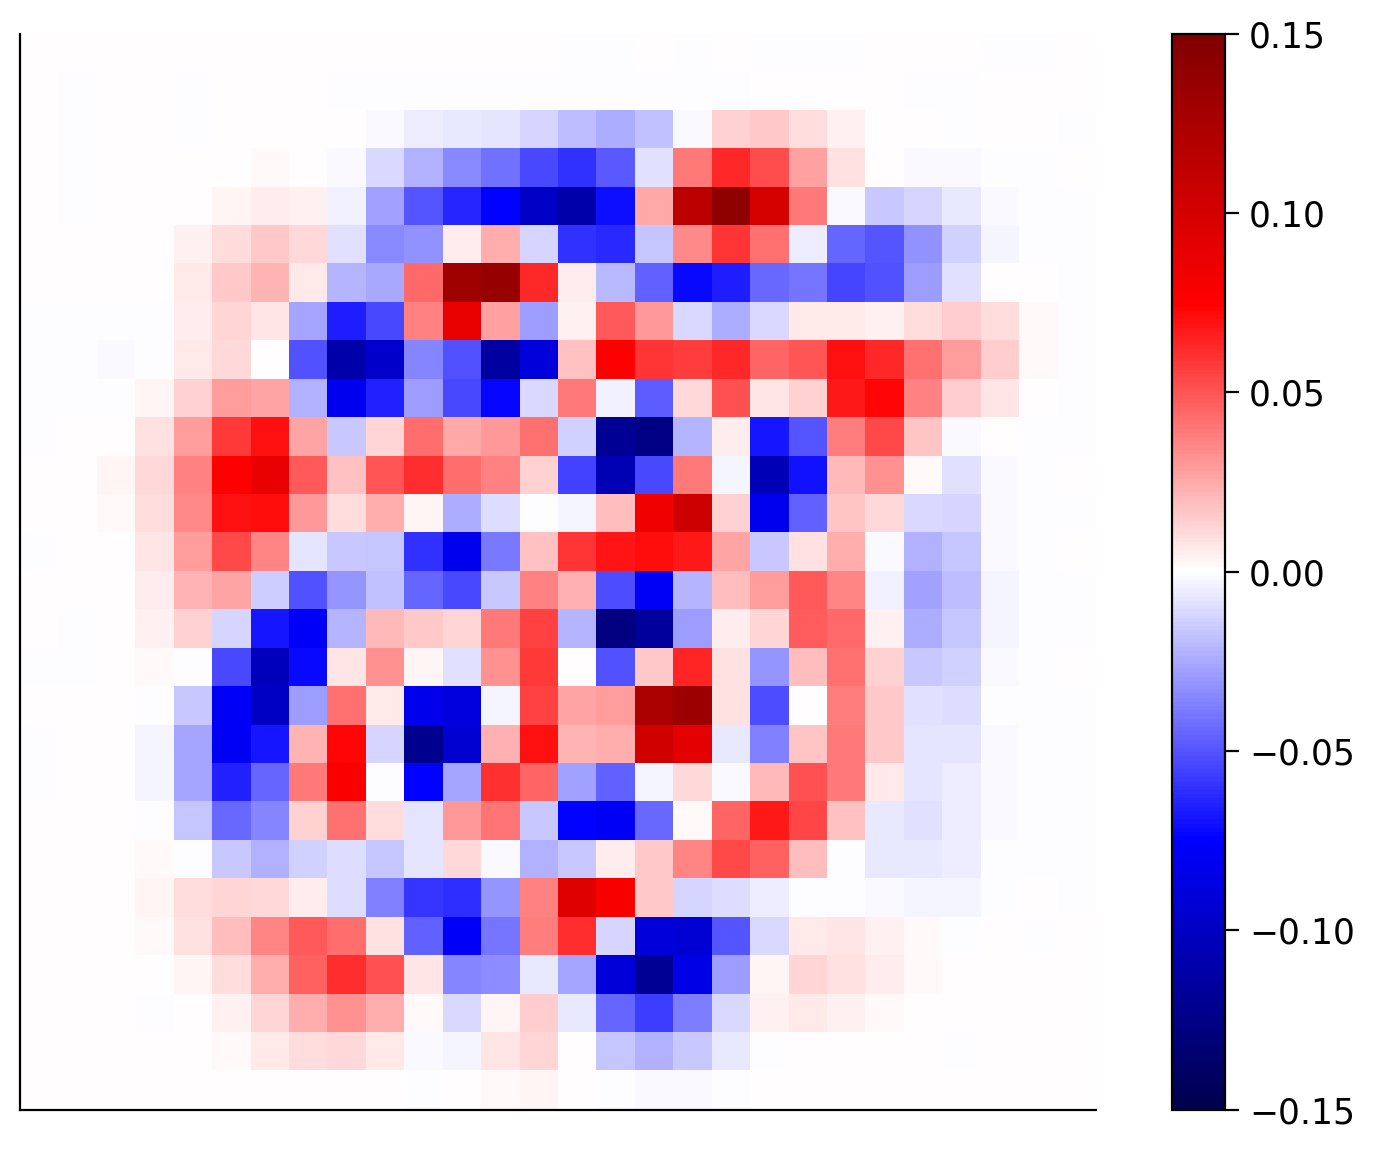

In [36]:
# Plot the weights of the first principal component
plot_MNIST_weights(evectors[:, 51])

### Pregunta: que PC1 obtengo si mi input es un 0? y si es un 1?

## Visualizemos los datos!

In [12]:
def visualize_components(component1, component2, labels, show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

  Returns:
    Nothing.

  """

  plt.figure()
  plt.scatter(x=component1, y=component2, c=labels, cmap='tab10', marker='.', s = 4)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

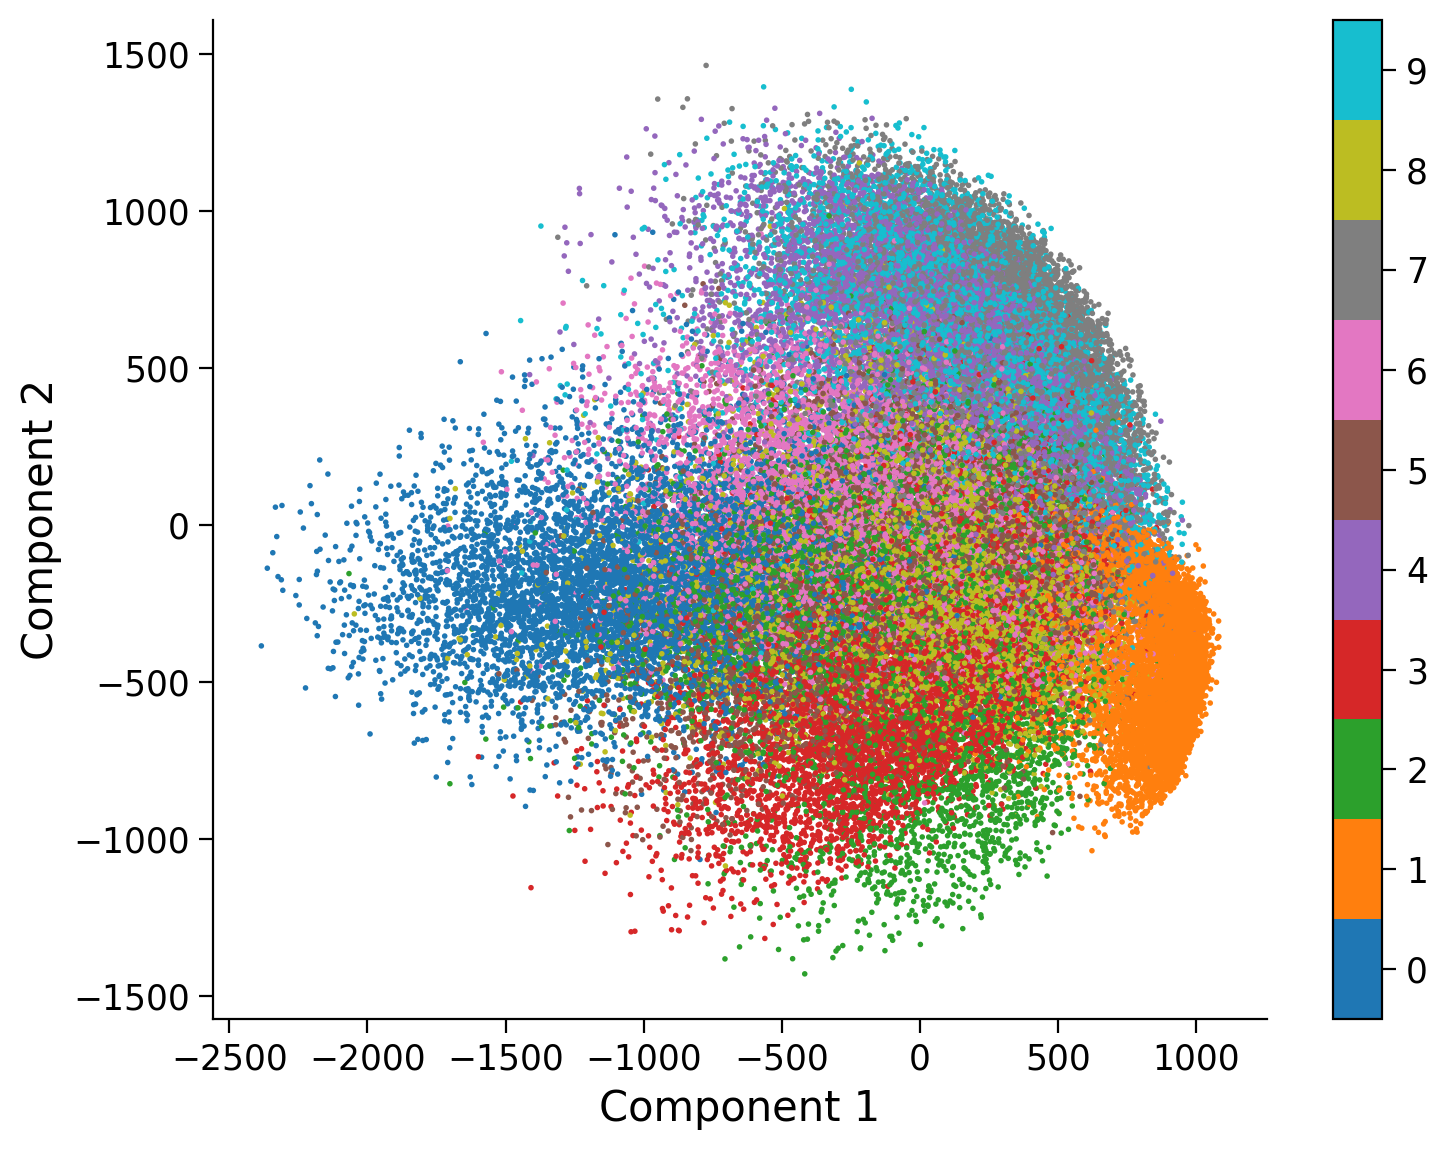

In [13]:
labels_all = np.array([int(k) for k in mnist.target])
visualize_components(score[:,0], score[:,1], labels_all)

# Eliminación de ruido con PCA

Le vamos a agregar ruido "sal y pimienta" a 20% de los pixels


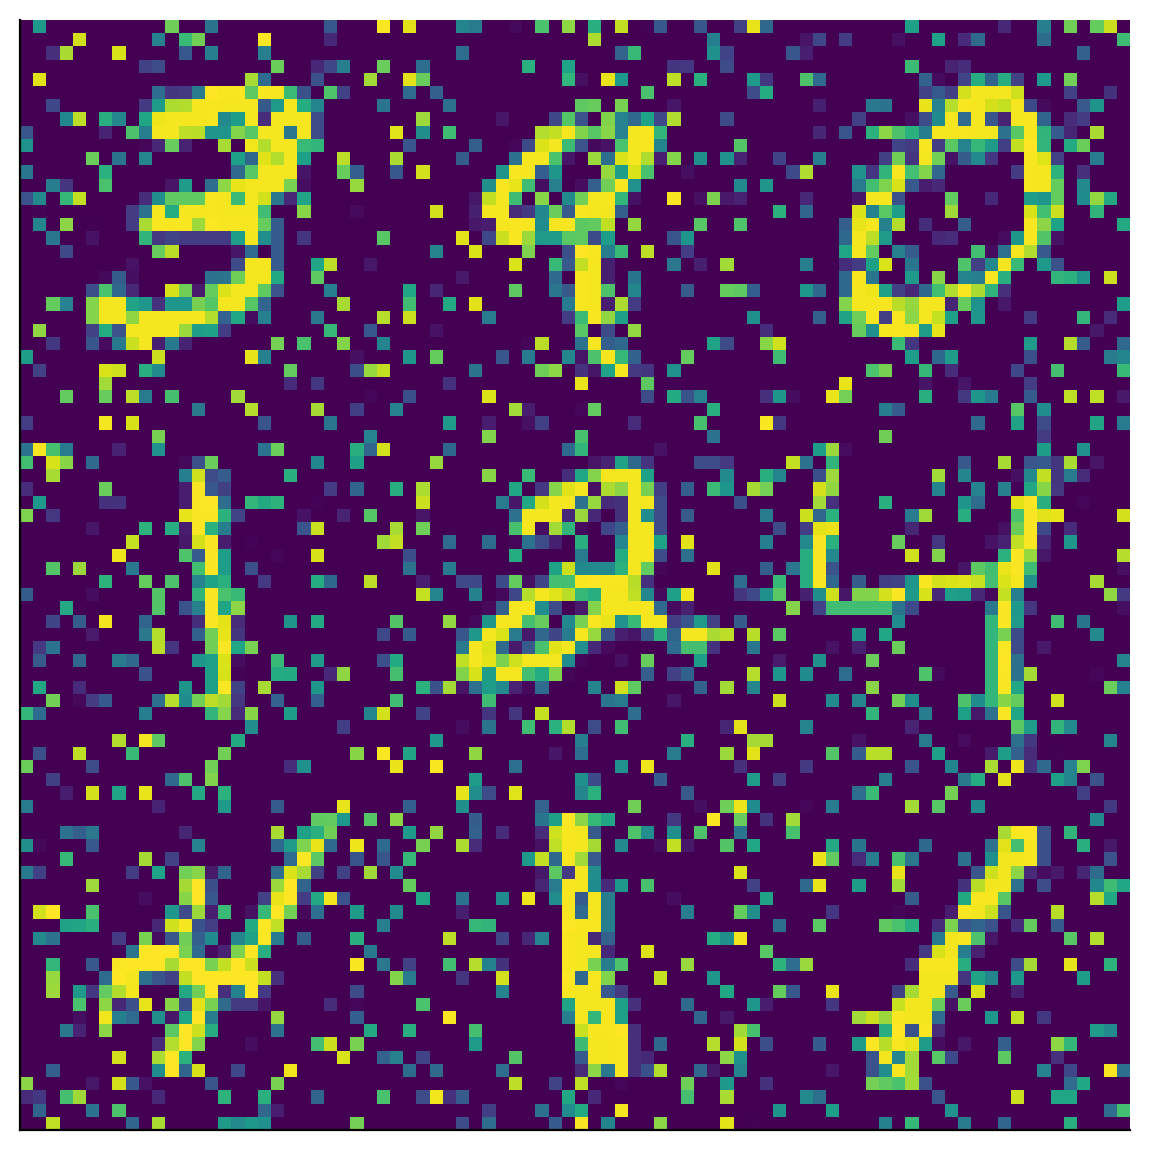

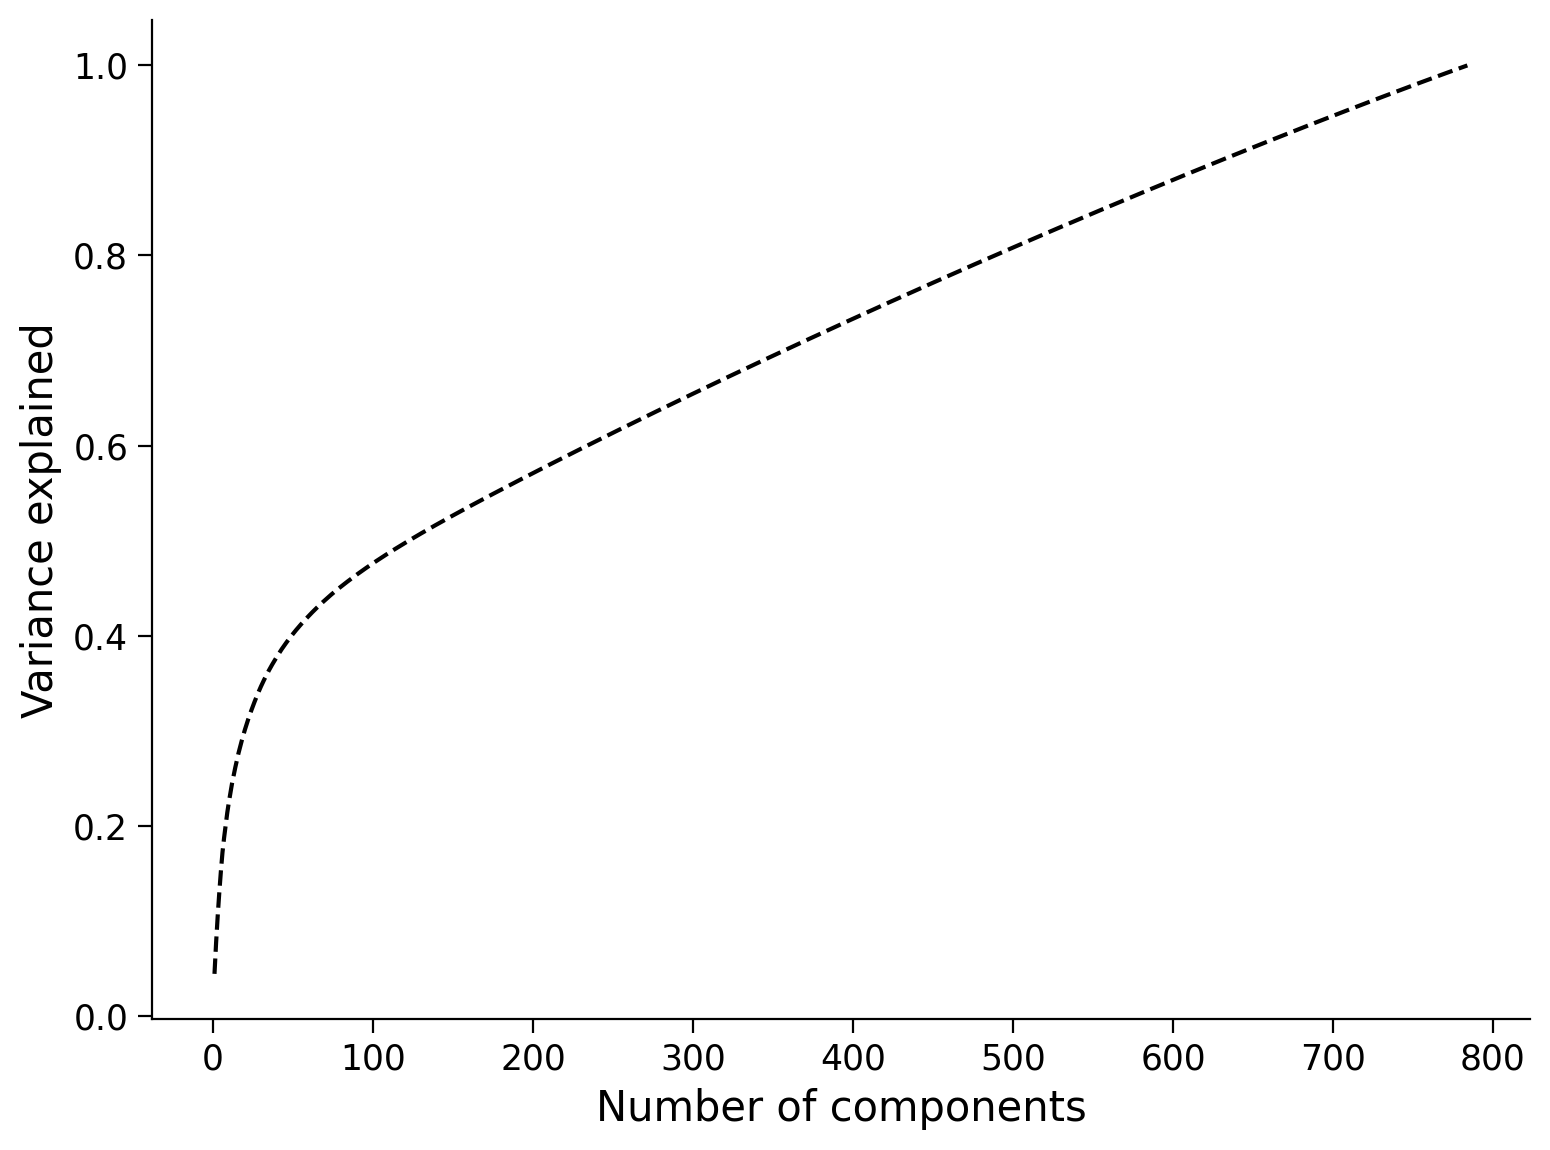

In [14]:
np.random.seed(2020)  # set random seed

# Add noise to data
X_noisy = add_noise(X, .2)

# Perform PCA on noisy data
score_noisy, evectors_noisy, evals_noisy = pca(X_noisy)

# Compute variance explained
variance_explained_noisy = get_variance_explained(evals_noisy)

# Visualize
plot_MNIST_sample(X_noisy)
plot_variance_explained(variance_explained_noisy)

# Cuantos PCs necesito ahora para explicar 90% de la varianza? Como se compara esta distribución con como era antes?

### Podemos reconstruir usando los pesos originales!

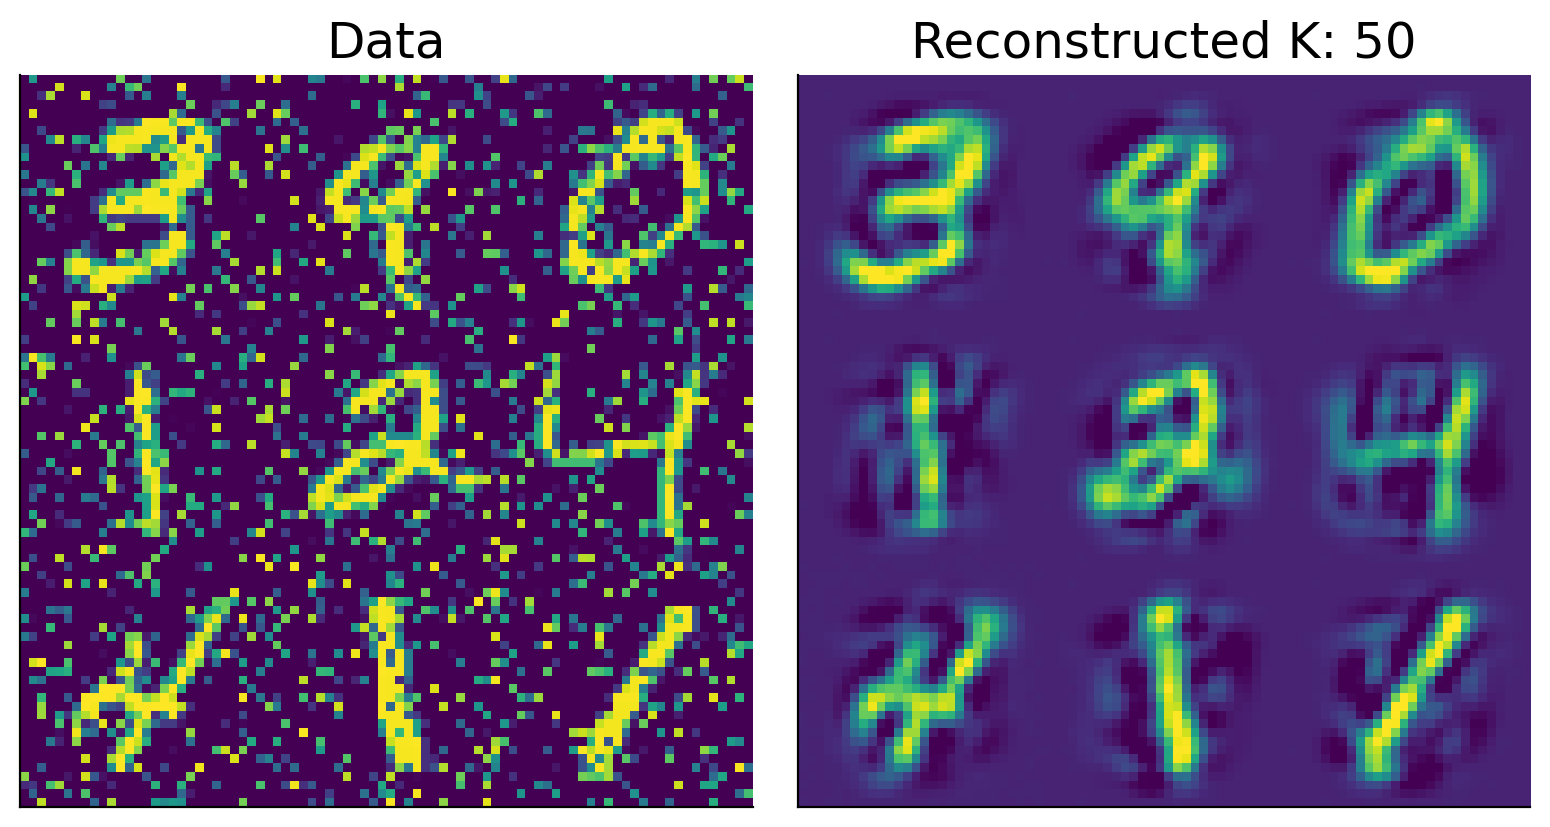

In [15]:
np.random.seed(2020)  # set random seed

# Sumo ruido
X_noisy = add_noise(X, .2)

# Calculo las medias
X_noisy_mean = np.mean(X_noisy, 0)

# Proyecto con los pesos originales
projX_noisy = np.matmul(X_noisy - X_noisy_mean, evectors)

# Reconstruyo
K = 50
X_reconstructed = reconstruct_data(projX_noisy, evectors, X_noisy_mean, K)

# Visualize
plot_MNIST_reconstruction(X_noisy, X_reconstructed, K)